# 1. Introduccion

En este proyecto, se desarrolla un modelo predictivo para identificar clientes en riesgo de rotación (churn) para una empresa de telecomunicaciones. La rotación de clientes es un desafío crítico para las empresas, ya que **retener clientes** existentes es más rentable que adquirir nuevos.

Para eso, importaremos un dataset obtenido en Kaggle:

- customer churn dataset:
customer_churn_dataset-training-master.csv

- Tambien podras obtener el archivo en el repositorio de Github

# 2. Análisis Exploratorio de Datos (EDA)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del dataset
try:
    df = pd.read_csv('customer_churn_dataset-training-master.csv')
    print("Dataset cargado exitosamente.")
except FileNotFoundError:
    print("Error: El archivo 'customer_churn_dataset-training-master.csv' no se encontró.")

Dataset cargado exitosamente.


In [4]:
df.head() #Primeros registros

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
df.tail() #Ultimos registros

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


In [6]:
df.shape # (Filas,Columnas)

(440833, 12)

In [7]:
df.info() #Info de cada atributo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [8]:
df.columns #Atributos

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [9]:
numerical_cols=df.select_dtypes(include='number').columns #Columnas tipo 'number'
print(numerical_cols)

Index(['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')


In [10]:
categorical_cols=df.select_dtypes(include='object').columns #Columnas tipo 'object'
print(categorical_cols)

Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')


In [11]:
df['Churn'].value_counts() #Valores posibles de la columna 'Churn'

,count
Churn,
1.0,249999
0.0,190833


En un total de 440833 registros:

- 249999 churn - Rotaron (Se fueron)

- 190833 No churn - No rotaron (se quedaron)


A continuacion, profundizaremos el analisis

In [23]:
# Aseguramos que df esté cargado y con los NaNs eliminados

if 'CustomerID' in df.columns:
    df.drop('CustomerID', axis=1, inplace=True)
    print("Columna 'CustomerID' eliminada del DataFrame.")
else:
    print("La columna 'CustomerID' no se encontró o ya fue eliminada.")

La columna 'CustomerID' no se encontró o ya fue eliminada.


Columnas numéricas actualizadas: Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')


<ipython-input-24-6183294e93ac>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x='Churn', palette='viridis')
<ipython-input-24-6183294e93ac>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x='Churn', palette='viridis')
<ipython-input-24-6183294e93ac>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x='Churn', palette='viridis')
<ipython-input-24-6183294e93ac>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

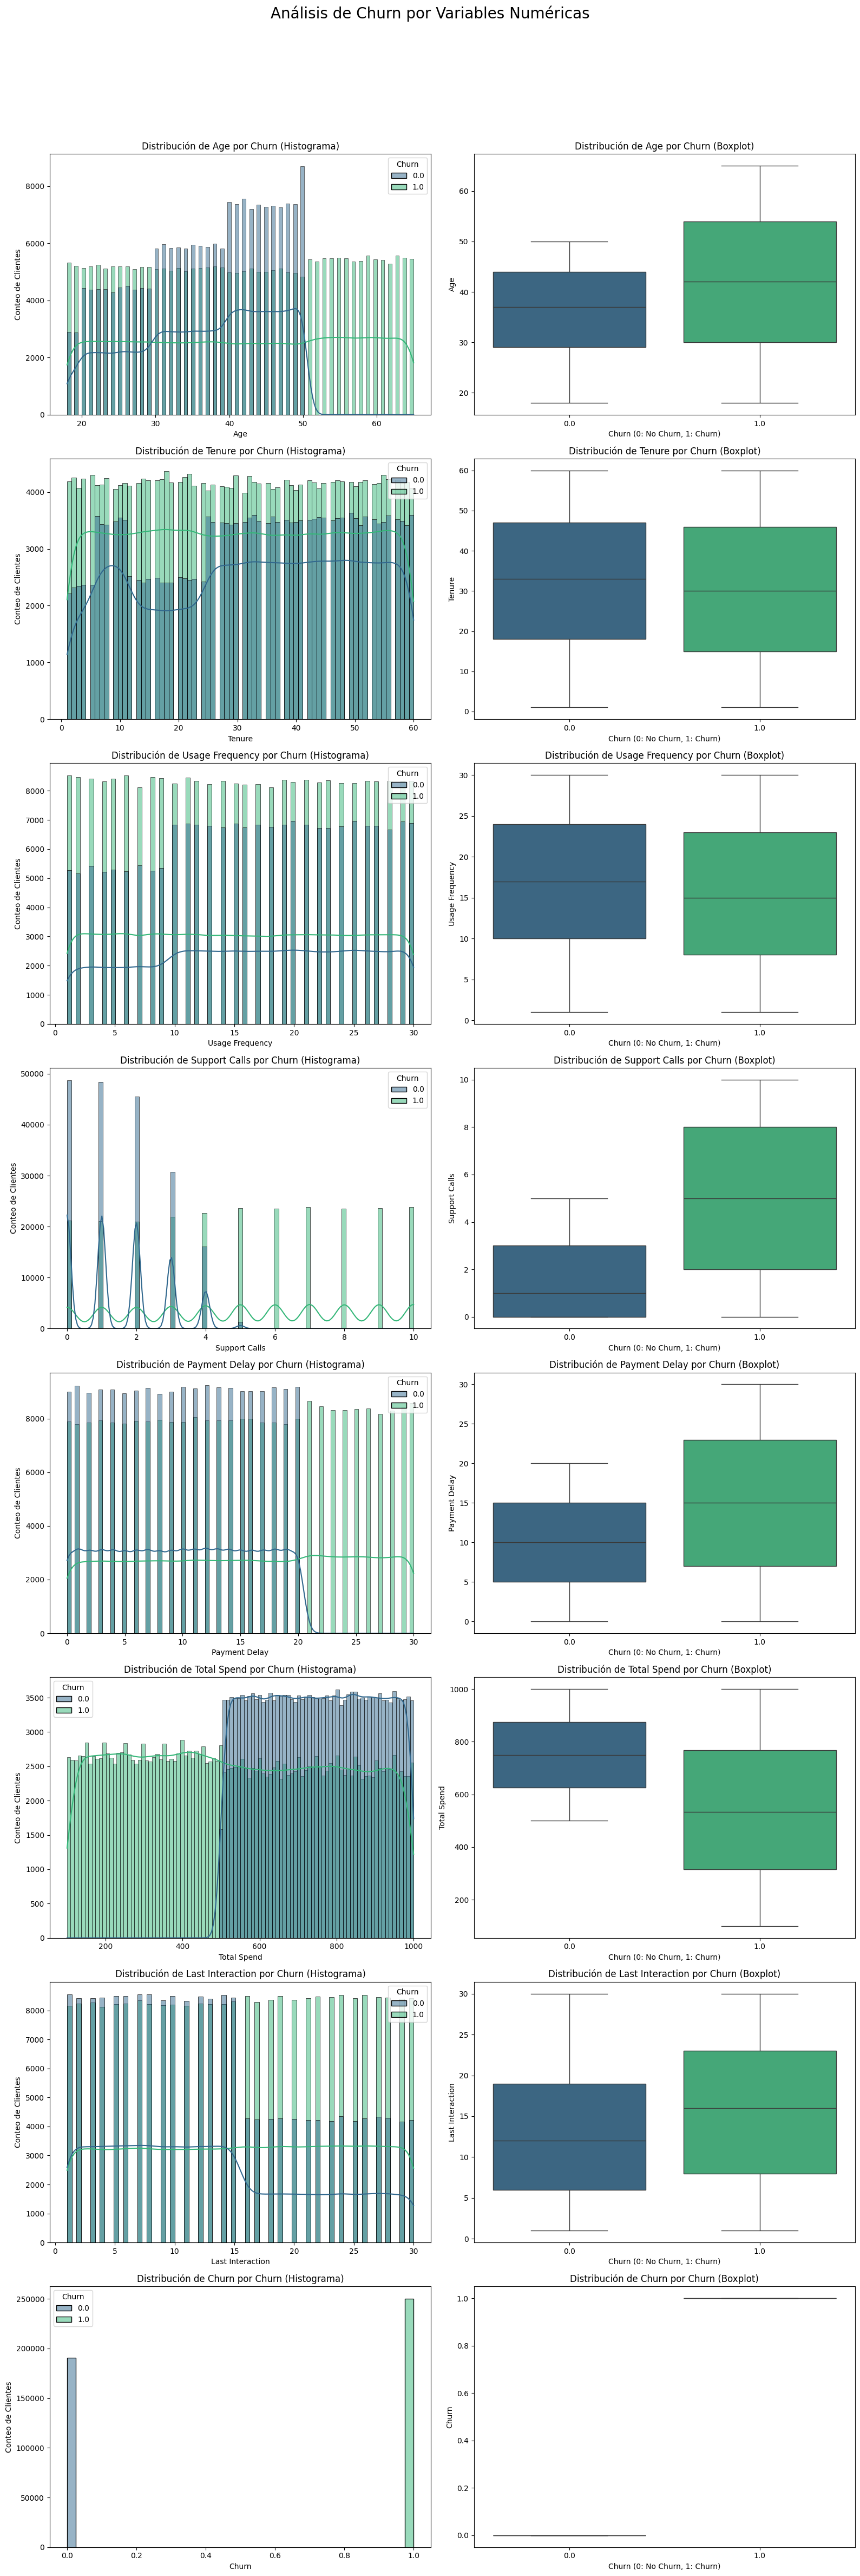

In [24]:
# Actualizamos lista de columnas numéricas después de eliminar 'CustomerID'
numerical_cols=df.select_dtypes(include='number').columns #Columnas del tipo
print("Columnas numéricas actualizadas:", numerical_cols)

# Definimos el número de filas y columnas para la cuadrícula de gráficos
num_cols_num = len(numerical_cols)
num_rows_num = num_cols_num # Una fila por cada variable numérica, con 2 gráficos cada una

plt.figure(figsize=(16, num_rows_num * 6)) # Ajustamos el tamaño de la figura
plt.suptitle('Análisis de Churn por Variables Numéricas', fontsize=20, y=1.02)

for i, col in enumerate(numerical_cols):
    # Histograma con KDE para ver la distribución
    plt.subplot(num_rows_num, 2, 2 * i + 1)
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='viridis', common_norm=False)
    plt.title(f'Distribución de {col} por Churn (Histograma)')
    plt.xlabel(col)
    plt.ylabel('Conteo de Clientes')

    # Boxplot para ver medianas, cuartiles y outliers
    plt.subplot(num_rows_num, 2, 2 * i + 2)
    sns.boxplot(data=df, y=col, x='Churn', palette='viridis')
    plt.title(f'Distribución de {col} por Churn (Boxplot)')
    plt.xlabel('Churn (0: No Churn, 1: Churn)')
    plt.ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

## Conclusiones EDA

Los que **rotan** (churn) tienden a tener **menos antigüedad** (es decir, llevan menos tiempo siendo clientes).
El boxplot muestra claramente que a mayor antigüedad, menor probabilidad de rotar.


---


Los que se quedan(no churn) tienden a usar el servicio con mayor frecuencia.
**Mayor uso** significa que **se quedan.**


---


Los que hacen **más llamadas a soporte**, más probabilidad de **Rotar** (churn).


---


**Mayor Payment Delay** asociado con **más Churn**.
Los que se quedan suelen pagar más puntualmente.


---


Los clientes que **se quedan gastan más**.
No churn asociado a mas gastos.


---


Los que **se quedan** (no churn) suelen **interactuar más recientemente**.
Los que hacen Churn tienen un mayor número de días desde su última interacción.

# 3. Preprocesamiento

## Codificar variables categoricas

In [14]:
import pandas as pd
import numpy as np

# Primero, identificamos las columnas categóricas en el DataFrame.
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Aseguramos que Churn sea numerica
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print("Columnas categóricas identificadas para codificación:", categorical_cols)

# Aplicamos One-Hot Encoding
# Creamos un nuevo DataFrame 'df_encoded' para almacenar el resultado
# La función pd.get_dummies() es la que realiza el One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\n--- Resultados después de One-Hot Encoding ---")
print("Dimensiones del DataFrame después de One-Hot Encoding (filas, columnas):", df_encoded.shape)
print("\nPrimeras 5 filas del DataFrame con columnas categóricas codificadas:")
print(df_encoded.head())

# Verificamos que las columnas categóricas originales fueron reemplazadas
print("\nVerificando que las columnas categóricas originales ya no están (deben dar KeyError si intentamos acceder):")
for col in categorical_cols:
    if col in df_encoded.columns:
        print(f"ERROR: La columna '{col}' original todavía está en el DataFrame codificado.")
    else:
        print(f"OK: La columna '{col}' original fue reemplazada.")

# Confirmamos el efecto del One-Hot Encoding
print("\nNombres de algunas de las nuevas columnas binarias creadas:")
# Filtra las columnas que terminan con '_True', '_False', '_Male', etc. o contienen un '_'
newly_encoded_cols_sample = [col for col in df_encoded.columns if any(cat_col in col for cat_col in categorical_cols) and '_' in col]
print(newly_encoded_cols_sample[:10]) # Muestra solo las primeras

Columnas categóricas identificadas para codificación: ['Gender', 'Subscription Type', 'Contract Length']

--- Resultados después de One-Hot Encoding ---
Dimensiones del DataFrame después de One-Hot Encoding (filas, columnas): (440833, 13)

Primeras 5 filas del DataFrame con columnas categóricas codificadas:
    Age  Tenure  Usage Frequency  Support Calls  Payment Delay  Total Spend  \
0  30.0    39.0             14.0            5.0           18.0        932.0   
1  65.0    49.0              1.0           10.0            8.0        557.0   
2  55.0    14.0              4.0            6.0           18.0        185.0   
3  58.0    38.0             21.0            7.0            7.0        396.0   
4  23.0    32.0             20.0            5.0            8.0        617.0   

   Last Interaction  Churn  Gender_Male  Subscription Type_Premium  \
0              17.0    1.0        False                      False   
1               6.0    1.0        False                      False   
2     

## Escalado de Variables Numéricas

In [15]:
from sklearn.preprocessing import StandardScaler

# Identificamos las columnas numéricas en el DataFrame df_encoded.
# 'Churn' es la variable objetivo y NO se escala.
# Las columnas binarias creadas por One-Hot Encoding (True/False o 0/1) tampoco necesitan escalado.
numeric_cols_to_scale = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Aseguramos de que 'Churn' no esté en la lista de columnas a escalar
if 'Churn' in numeric_cols_to_scale:
    numeric_cols_to_scale.remove('Churn')

print("\nColumnas numéricas identificadas para escalar:", numeric_cols_to_scale)

# Inicializar el StandardScaler
scaler = StandardScaler()

# Ajustamos el escalador a los datos numéricos y luego transformarlos.
df_scaled = df_encoded.copy()
df_scaled[numeric_cols_to_scale] = scaler.fit_transform(df_scaled[numeric_cols_to_scale])

print("\n--- Resultados después del Escalado de Variables Numéricas ---")
print("\nPrimeras 5 filas del DataFrame con columnas numéricas escaladas:")
print(df_scaled.head())

# Verificar las estadísticas descriptivas de las columnas escaladas
print("\nEstadísticas descriptivas de columnas numéricas después del escalado:")
print(df_scaled[numeric_cols_to_scale].describe())
# Deberíamos ver que la 'mean' de estas columnas es muy cercana a 0 y 'std' (desviación estándar) es muy cercana a 1.


Columnas numéricas identificadas para escalar: ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

--- Resultados después del Escalado de Variables Numéricas ---

Primeras 5 filas del DataFrame con columnas numéricas escaladas:
        Age    Tenure  Usage Frequency  Support Calls  Payment Delay  \
0 -0.753326  0.448760        -0.210511       0.454549       0.609620   
1  2.059646  1.028278        -1.724562       2.083100      -0.601319   
2  1.255940 -1.000036        -1.375166       0.780259       0.609620   
3  1.497051  0.390808         0.604748       1.105969      -0.722413   
4 -1.315921  0.043097         0.488282       0.454549      -0.601319   

   Total Spend  Last Interaction  Churn  Gender_Male  \
0     1.247427          0.293052    1.0        False   
1    -0.309865         -0.986584    1.0        False   
2    -1.854698         -1.335575    1.0        False   
3    -0.978462          1.689018    1.0         True   
4  

# 4. Modelo predictivo

## Division del dataset

In [18]:
from sklearn.model_selection import train_test_split

# df_scaled - DataFrame completamente preprocesado
# Identificamos características (X) y tu variable objetivo (y)

# X contendrá todas las columnas excepto 'Churn'
X = df_scaled.drop('Churn', axis=1)

# y contendrá solo la columna 'Churn'
y = df_scaled['Churn']

print("Dimensiones de X (características):", X.shape)
print("Dimensiones de y (variable objetivo):", y.shape)

# Dividimos los datos en conjuntos de entrenamiento y prueba
# test_size=0.20 significa que el 20% de los datos se usarán para la prueba, 80% para el entrenamiento
# random_state=42 asegura que la división sea reproducible (siempre obtendrás los mismos conjuntos)
# stratify=y es CRUCIAL para problemas con desbalance de clases (como el tuyo).
# Asegura que la proporción de clases (Churn vs No Churn) sea la misma en los conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("\nDimensiones de X_train (características de entrenamiento):", X_train.shape)
print("Dimensiones de X_test (características de prueba):", X_test.shape)
print("Dimensiones de y_train (objetivo de entrenamiento):", y_train.shape)
print("Dimensiones de y_test (objetivo de prueba):", y_test.shape)

# Verificamos la proporción de clases en y_train y y_test (deberían ser similares)
print("\nProporción de clases en y_train:")
print(y_train.value_counts(normalize=True))
print("\nProporción de clases en y_test:")
print(y_test.value_counts(normalize=True))

Dimensiones de X (características): (440832, 12)
Dimensiones de y (variable objetivo): (440832,)

Dimensiones de X_train (características de entrenamiento): (352665, 12)
Dimensiones de X_test (características de prueba): (88167, 12)
Dimensiones de y_train (objetivo de entrenamiento): (352665,)
Dimensiones de y_test (objetivo de prueba): (88167,)

Proporción de clases en y_train:
Churn
1.0    0.567108
0.0    0.432892
Name: proportion, dtype: float64

Proporción de clases en y_test:
Churn
1.0    0.567106
0.0    0.432894
Name: proportion, dtype: float64


## Seleccion y entrenamiento de modelos

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Regresión Logística ---
print("--- Entrenando Modelo de Regresión Logística ---")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' es un buen solver para datasets pequeños/medianos
log_reg_model.fit(X_train, y_train)

# Predicciones
y_pred_log_reg = log_reg_model.predict(X_test)
y_proba_log_reg = log_reg_model.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva (Churn=1)

# --- 2. Random Forest Classifier ---
print("\n--- Entrenando Modelo Random Forest ---")
# n_estimators: número de árboles en el bosque
# class_weight='balanced' es útil para datasets desbalanceados, ajusta el peso de las clases automáticamente
rand_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rand_forest_model.fit(X_train, y_train)

# Predicciones
y_pred_rand_forest = rand_forest_model.predict(X_test)
y_proba_rand_forest = rand_forest_model.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva (Churn=1)

print("\nModelos entrenados. Listos para la evaluación.")

--- Entrenando Modelo de Regresión Logística ---

--- Entrenando Modelo Random Forest ---

Modelos entrenados. Listos para la evaluación.


##  Evaluación del Modelo


--- Evaluación del Modelo: Regresión Logística ---
Matriz de Confusión:
[[34492  3675]
 [ 5730 44270]]


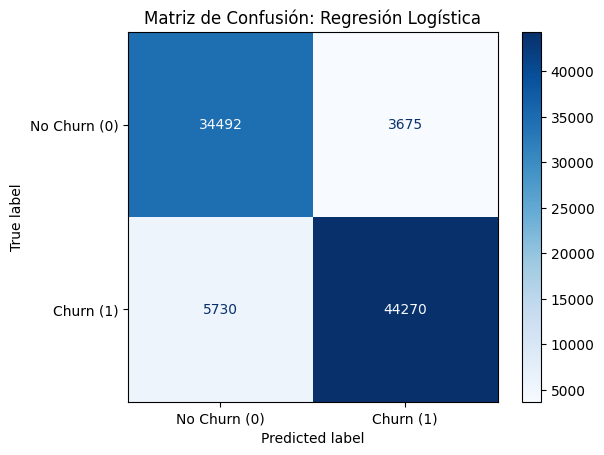

Accuracy:  0.8933
Precision: 0.9233
Recall:    0.8854
F1-Score:  0.9040
AUC-ROC:   0.9590

--- Evaluación del Modelo: Random Forest ---
Matriz de Confusión:
[[38164     3]
 [   27 49973]]


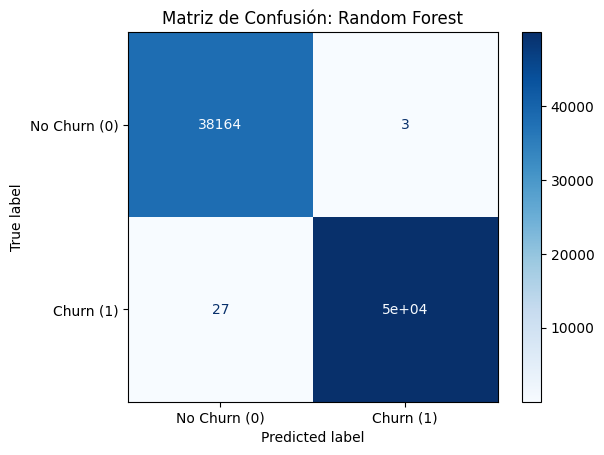

Accuracy:  0.9997
Precision: 0.9999
Recall:    0.9995
F1-Score:  0.9997
AUC-ROC:   1.0000


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model_name, y_true, y_pred, y_proba):
    """
    Función para evaluar un modelo de clasificación y mostrar métricas.
    """
    print(f"\n--- Evaluación del Modelo: {model_name} ---")

    # Matriz de Confusión
    cm = confusion_matrix(y_true, y_pred)
    print("Matriz de Confusión:")
    print(cm)

    # Visualizar la matriz de confusión (muy útil)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn (0)', 'Churn (1)'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusión: {model_name}')
    plt.show()

    # Métricas de Clasificación
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba) # Para AUC-ROC, necesitamos las probabilidades

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"AUC-ROC:   {roc_auc:.4f}")

# Evalua Regresión Logística
evaluate_model('Regresión Logística', y_test, y_pred_log_reg, y_proba_log_reg)

# Evalua Random Forest
evaluate_model('Random Forest', y_test, y_pred_rand_forest, y_proba_rand_forest)

## Interpretacion del modelo


--- Importancia de las Características (Feature Importance) del Modelo Random Forest ---
                       Feature  Importance
3                Support Calls    0.299032
5                  Total Spend    0.218865
0                          Age    0.140514
10     Contract Length_Monthly    0.131770
4                Payment Delay    0.122602
6             Last Interaction    0.035883
7                  Gender_Male    0.032151
1                       Tenure    0.008627
11   Contract Length_Quarterly    0.005718
2              Usage Frequency    0.003272
9   Subscription Type_Standard    0.000872
8    Subscription Type_Premium    0.000694


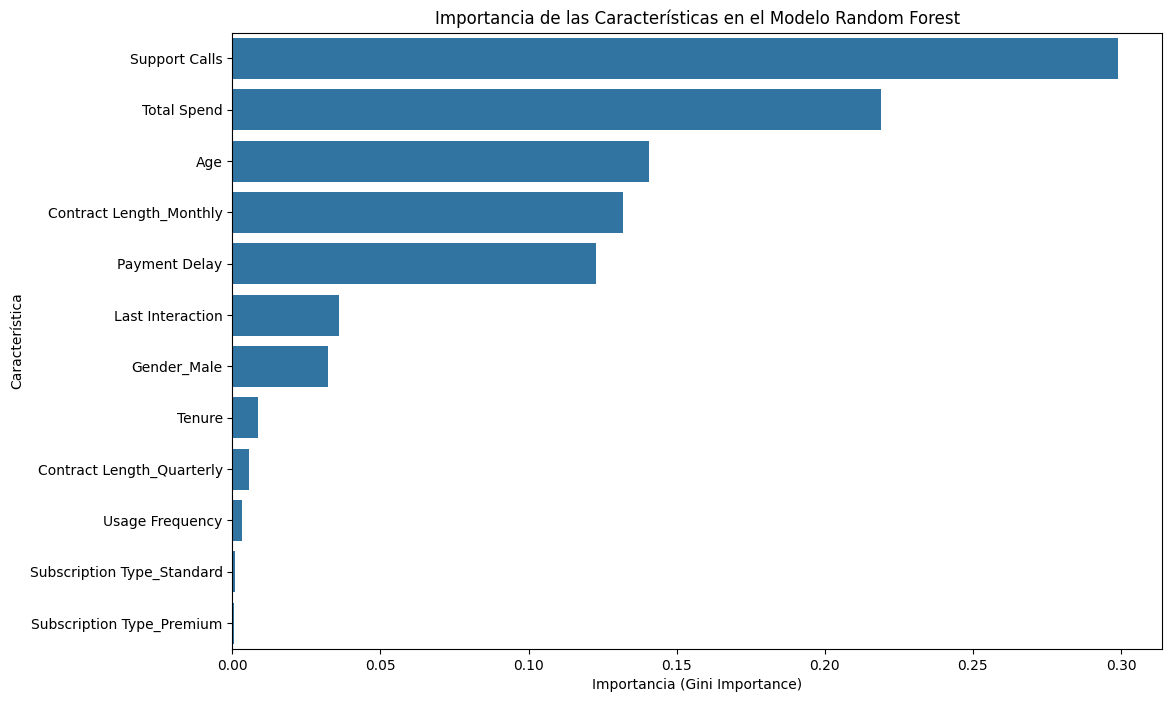

In [22]:
# Asegurarse de que rand_forest_model ya ha sido entrenado.

print("\n--- Importancia de las Características (Feature Importance) del Modelo Random Forest ---")

# Obtenemos la importancia de las características
feature_importances = rand_forest_model.feature_importances_

# Creamos DataFrame para visualizar la importancia de cada característica
features_df = pd.DataFrame({
    'Feature': X_train.columns, # Los nombres de tus columnas de características
    'Importance': feature_importances
})

# Ordena por importancia de forma descendente
features_df = features_df.sort_values(by='Importance', ascending=False)

# Muestra las características más importantes
print(features_df)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.xlabel('Importancia (Gini Importance)')
plt.ylabel('Característica')
plt.show()

# 5. Conclusiones y recomendaciones

### Mejora de la Experiencia con el Soporte al Cliente:
Insight: Support Calls es la característica más crítica. Un alto número de llamadas a soporte es la señal de alerta más fuerte para la rotación.
Recomendación: Implementar un sistema de monitoreo proactivo de las interacciones de soporte. Identificar y priorizar a los clientes con múltiples llamadas, baja resolución en el primer contacto o llamadas de alta frustración. Mejorar la capacitación del personal de soporte y la calidad de la resolución de problemas para reducir la necesidad de llamadas recurrentes.


---


### Estrategias para Aumentar el Gasto y el Compromiso del Cliente:
Insight: Total Spend es la segunda característica más importante. Clientes con un gasto total bajo tienen más probabilidades de rotar.
Recomendación: Desarrollar programas de fidelización, incentivos y ofertas personalizadas para aumentar el uso del servicio y el gasto del cliente. Fomentar el "upselling" o "cross-selling" de productos/servicios adicionales para aumentar su valor percibido.


---


### Análisis por Segmentos de Edad y Campañas Personalizadas:
Insight: La Age es una característica importante en el modelo.
Recomendación: Aunque el EDA inicial no mostró una correlación simple, el modelo encontró patrones complejos. Esto sugiere la necesidad de investigar si ciertos rangos de edad tienen necesidades o puntos de dolor específicos. Desarrollar campañas de retención o marketing dirigidas a segmentos de edad específicos podría ser efectivo.


---


### Incentivos para Contratos a Largo Plazo:
Insight: Los clientes con Contract Length_Monthly son un grupo de alto riesgo.
Recomendación: Ofrecer descuentos sustanciales, beneficios premium o características exclusivas para incentivar la migración de contratos mensuales a anuales o bienales. Destacar el valor a largo plazo de los contratos más extensos.


---


### Gestión Proactiva de Retrasos en Pagos:
Insight: Los Payment Delay son un predictor fuerte de churn.
Recomendación: Establecer alertas tempranas para retrasos en pagos. Contactar proactivamente a estos clientes para entender la situación, ofrecer planes de pago flexibles o recordatorios amigables. Esto puede prevenir la rotación antes de que sea inevitable.